WDI GWANDA TOWN BY POWELL A. NDLOVU ENVIRONMENTAL OFFICER

In [18]:
import os
import glob
import numpy as np
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.mask import mask

In [2]:
# ------------------ Set File Paths ------------------
# Directories where individual band files for each year are stored.
landsat_2014_dir = "C:/Users/User/Desktop/LandclassificationProject/Mat_South_Towns/Gwanda_Town/L832014/"
landsat_2024_dir = "C:/Users/User/Desktop/LandclassificationProject/Mat_South_Towns/Gwanda_Town/L812024"
shapefile_path = "C:/Users/User/Desktop/LandclassificationProject/Mat_South_Towns/Gwanda_Town/Gwanda_shapefile/Gwanda_Town.shp"
output_directory = "C:/Users/User/Desktop/LandclassificationProject/Mat_South_Towns/Gwanda_Town/"

os.makedirs(output_directory, exist_ok=True)

# ------------------ Function: Stack Raster Bands ------------------
def stack_raster(bands, output_path):
    """
    Stacks a list of raster files (each containing one band) into a single multiband file.
    """
    with rasterio.open(bands[0]) as src0:
        meta = src0.meta.copy()
    
    # Update the metadata to reflect the number of bands being stacked
    meta.update(count=len(bands))
    
    with rasterio.open(output_path, 'w', **meta) as dest:
        for i, band in enumerate(bands, start=1):
            with rasterio.open(band) as src:
                dest.write(src.read(1), i)
    
    return output_path


In [3]:
# ------------------ Load and Stack Bands for 2024 ------------------
# Use glob to get the sorted list of band files that contain B2 to B7 in the filename.
landsat_2024_bands = sorted(glob.glob(os.path.join(landsat_2024_dir, "*B[2-7]*.tif")))
output_2024_path = os.path.join(output_directory, "stacked_2024.tif")
stacked_2024 = stack_raster(landsat_2024_bands, output_2024_path)
print("2024 bands stacked and saved to:", stacked_2024)

2024 bands stacked and saved to: C:/Users/User/Desktop/LandclassificationProject/Mat_South_Towns/Gwanda_Town/stacked_2024.tif


In [4]:
# ------------------ Load and Stack Bands for 2014 ------------------
landsat_2014_bands = sorted(glob.glob(os.path.join(landsat_2014_dir, "*B[2-7]*.tif")))
output_2014_path = os.path.join(output_directory, "stacked_2014.tif")
stacked_2014 = stack_raster(landsat_2014_bands, output_2014_path)
print("2014 bands stacked and saved to:", stacked_2014)

2014 bands stacked and saved to: C:/Users/User/Desktop/LandclassificationProject/Mat_South_Towns/Gwanda_Town/stacked_2014.tif


In [5]:
# ------------------ Function: Clip Raster using Shapefile ------------------
def clip_raster(raster_path, shape, output_path):
    """
    Clips the raster at raster_path using the geometries in the provided shapefile.
    """
    with rasterio.open(raster_path) as src:
        out_image, out_transform = mask(src, shape.geometry, crop=True)
        out_meta = src.meta.copy()
    
    out_meta.update({
        "height": out_image.shape[1],
        "width": out_image.shape[2],
        "transform": out_transform
    })

    with rasterio.open(output_path, "w", **out_meta) as dest:
        dest.write(out_image)
    
    return output_path


In [6]:
# ------------------ Load Shapefile and Ensure CRS Consistency ------------------
shape = gpd.read_file(shapefile_path)

def check_crs(raster_path, shape):
    with rasterio.open(raster_path) as src:
        raster_crs = src.crs
    if shape.crs != raster_crs:
        shape = shape.to_crs(raster_crs)
    return shape

In [7]:
# Ensure the shapefile is in the same CRS as the 2014 raster (assumed to be same for 2024)
shape = check_crs(stacked_2014, shape)

In [8]:
shape

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,2014F,geometry
0,0.167342,0.000714,10,ZW162110,None,None,None,Gwanda Urban,ZW1621,Matabeleland South,ZW16,Zimbabwe,ZW,2018-08-31,2018-09-11,NaT,0,"POLYGON ((708170.047 -2314780.291, 707620.361 ..."
1,0.057950,0.000153,2,ZW162102,None,None,None,Gwanda Urban,ZW1621,Matabeleland South,ZW16,Zimbabwe,ZW,2018-08-31,2018-09-11,NaT,0,"POLYGON ((707385.795 -2316243.712, 707620.361 ..."
2,0.050972,0.000118,4,ZW162104,None,None,None,Gwanda Urban,ZW1621,Matabeleland South,ZW16,Zimbabwe,ZW,2018-08-31,2018-09-11,NaT,0,"POLYGON ((708857.556 -2317003.436, 708530.433 ..."
3,0.053246,0.000158,5,ZW162105,None,None,None,Gwanda Urban,ZW1621,Matabeleland South,ZW16,Zimbabwe,ZW,2018-08-31,2018-09-11,NaT,0,"POLYGON ((709904.947 -2314604.871, 710927.142 ..."
4,0.057412,0.000215,3,ZW162103,None,None,None,Gwanda Urban,ZW1621,Matabeleland South,ZW16,Zimbabwe,ZW,2018-08-31,2018-09-11,NaT,0,"POLYGON ((708465.736 -2314173.961, 709904.947 ..."
5,0.037078,0.000076,9,ZW162109,None,None,None,Gwanda Urban,ZW1621,Matabeleland South,ZW16,Zimbabwe,ZW,2018-08-31,2018-09-11,NaT,0,"POLYGON ((711015.289 -2317705.061, 710984.124 ..."
6,0.052842,0.000120,8,ZW162108,None,None,None,Gwanda Urban,ZW1621,Matabeleland South,ZW16,Zimbabwe,ZW,2018-08-31,2018-09-11,NaT,0,"POLYGON ((710525.532 -2317045.575, 710719.691 ..."
7,0.088926,0.000290,1,ZW162101,None,None,None,Gwanda Urban,ZW1621,Matabeleland South,ZW16,Zimbabwe,ZW,2018-08-31,2018-09-11,NaT,0,"POLYGON ((708140.445 -2318907.122, 708116.692 ..."
8,0.029201,0.000050,7,ZW162107,None,None,None,Gwanda Urban,ZW1621,Matabeleland South,ZW16,Zimbabwe,ZW,2018-08-31,2018-09-11,NaT,0,"POLYGON ((710580.26 -2316437.828, 710541.411 -..."
9,0.056107,0.000087,6,ZW162106,None,None,None,Gwanda Urban,ZW1621,Matabeleland South,ZW16,Zimbabwe,ZW,2018-08-31,2018-09-11,NaT,0,"POLYGON ((711512.39 -2315831.743, 711557.122 -..."


In [9]:
# ------------------ Clip the Stacked Rasters ------------------
clipped_2014_path = os.path.join(output_directory, "clipped_2014.tif")
clipped_2014 = clip_raster(stacked_2014, shape, clipped_2014_path)
print("2014 raster clipped and saved to:", clipped_2014)

2014 raster clipped and saved to: C:/Users/User/Desktop/LandclassificationProject/Mat_South_Towns/Gwanda_Town/clipped_2014.tif


In [10]:
clipped_2024_path = os.path.join(output_directory, "clipped_2024.tif")
clipped_2024 = clip_raster(stacked_2024, shape, clipped_2024_path)
print("2024 raster clipped and saved to:", clipped_2024)

2024 raster clipped and saved to: C:/Users/User/Desktop/LandclassificationProject/Mat_South_Towns/Gwanda_Town/clipped_2024.tif


In [11]:
# ------------------ Function: Plot Composite ------------------
def plot_composite(raster_path, bands, title, output_path):
    """
    Create a composite image from selected band indices of the stacked raster.
    The 'bands' argument is a list of band indices (1-indexed).
    """
    with rasterio.open(raster_path) as src:
        # Stack the selected bands into a 3D array.
        image = np.dstack([src.read(b) for b in bands])
    
    # Normalize image for display (dividing by max value)
        image_norm = image / np.max(image)
        plt.figure(figsize=(8, 8))
    plt.title(title)
    plt.imshow(image_norm)
    plt.axis("off")
    plt.savefig(output_path, bbox_inches='tight')
    plt.show()

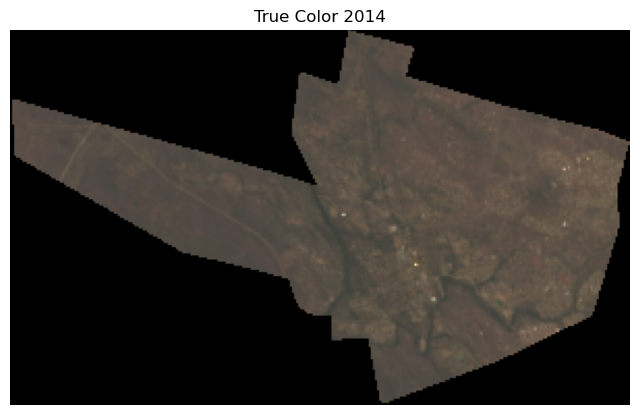

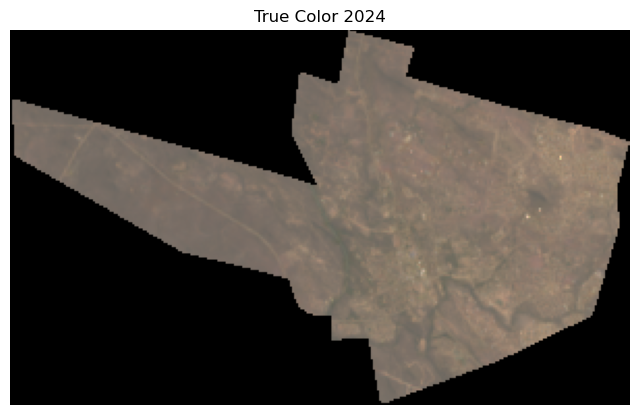

In [12]:
# ------------------ Create True and False Color Composites ------------------
# True Color Composite: Use new bands 3, 2, 1 (original bands 4, 3, 2)
plot_composite(clipped_2014, [3, 2, 1], "True Color 2014", os.path.join(output_directory, "true_color_2014.png"))
plot_composite(clipped_2024, [3, 2, 1], "True Color 2024", os.path.join(output_directory, "true_color_2024.png"))

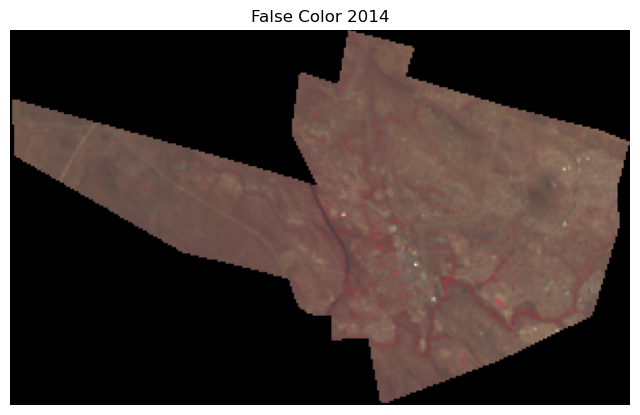

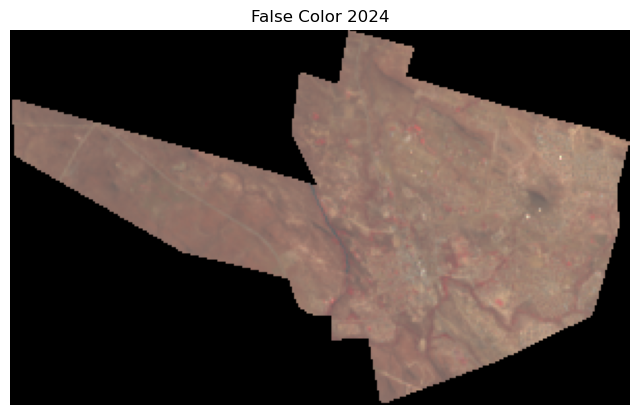

In [13]:
# False Color Composite: Use new bands 4, 3, 2 (original bands 5, 4, 3)
plot_composite(clipped_2014, [4, 3, 2], "False Color 2014", os.path.join(output_directory, "false_color_2014.png"))
plot_composite(clipped_2024, [4, 3, 2], "False Color 2024", os.path.join(output_directory, "false_color_2024.png"))

In [14]:
# ------------------ Function: Calculate Water Difference Index (WDI) ------------------
def calculate_wdi(raster_path):
    """
    Calculate the Water Difference Index (WDI) using:
      WDI = (NIR - SWIR) / (NIR + SWIR)
    For our stacked rasters:
      NIR is new band 4 (original Band 5)
      SWIR is new band 5 (original Band 6)
    """
    with rasterio.open(raster_path) as src:
        nir = src.read(4).astype(float)
        swir = src.read(5).astype(float)
    
    # Add a small constant to avoid division by zero
    wdi = (nir - swir) / (nir + swir + 0.0001)
    return wdi

wdi_2014 = calculate_wdi(clipped_2014)
wdi_2024 = calculate_wdi(clipped_2024)

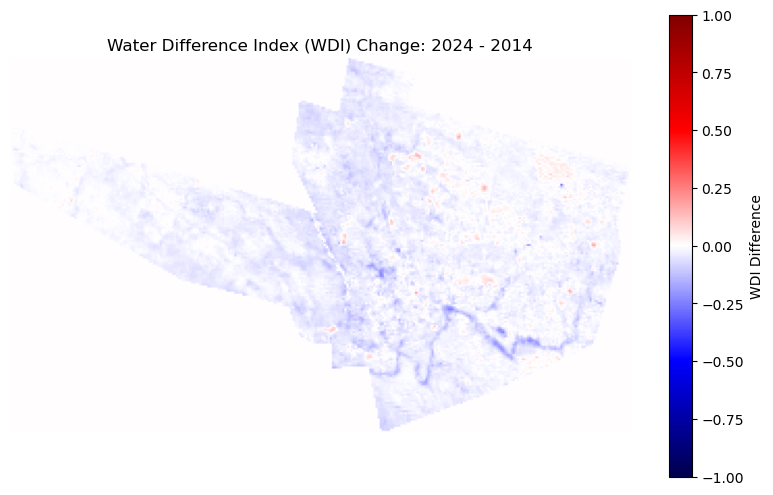

WDI difference map saved to: C:/Users/User/Desktop/LandclassificationProject/Mat_South_Towns/Gwanda_Town/wdi_difference.png


In [16]:
# ------------------ Visualize WDI Difference ------------------
wdi_difference = wdi_2024 - wdi_2014

plt.figure(figsize=(10, 6))
plt.title("Water Difference Index (WDI) Change: 2024 - 2014")
cax = plt.imshow(wdi_difference, cmap="seismic", vmin=-1, vmax=1)
plt.colorbar(cax, label="WDI Difference")
plt.axis("off")
wdi_diff_path = os.path.join(output_directory, "wdi_difference.png")
plt.savefig(wdi_diff_path, bbox_inches='tight')
plt.show()
print("WDI difference map saved to:", wdi_diff_path)


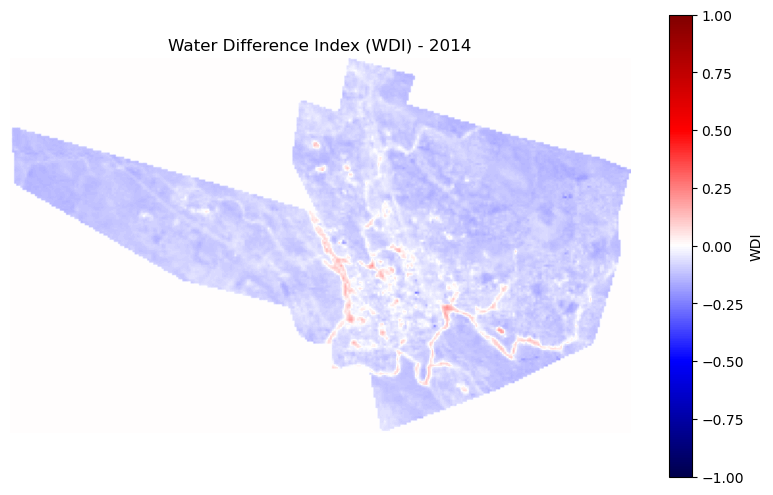

WDI 2014 map saved to: C:/Users/User/Desktop/LandclassificationProject/Mat_South_Towns/Gwanda_Town/wdi_2014.png


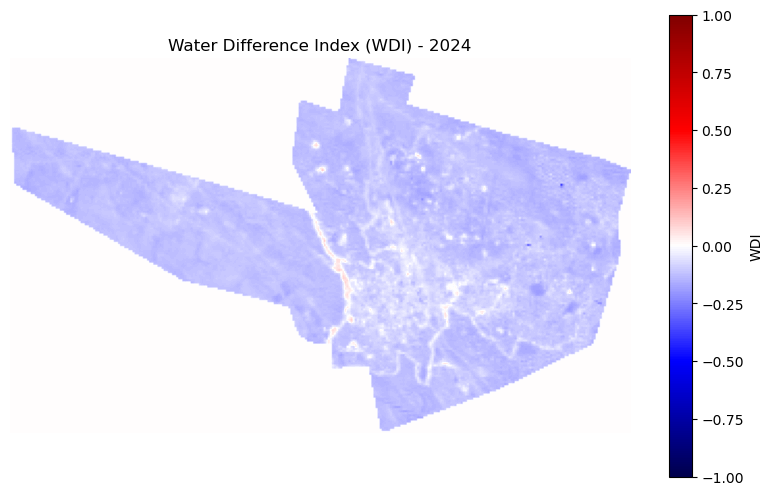

WDI 2024 map saved to: C:/Users/User/Desktop/LandclassificationProject/Mat_South_Towns/Gwanda_Town/wdi_2024.png


In [17]:
# ------------------ Visualize WDI for 2014 ------------------
plt.figure(figsize=(10, 6))
plt.title("Water Difference Index (WDI) - 2014")
# Adjust the vmin/vmax as needed for better contrast; using seismic here too.
wdi_2014_plot = plt.imshow(wdi_2014, cmap="seismic", vmin=-1, vmax=1)
plt.colorbar(wdi_2014_plot, label="WDI")
plt.axis("off")
wdi_2014_path = os.path.join(output_directory, "wdi_2014.png")
plt.savefig(wdi_2014_path, bbox_inches='tight')
plt.show()
print("WDI 2014 map saved to:", wdi_2014_path)

# ------------------ Visualize WDI for 2024 ------------------
plt.figure(figsize=(10, 6))
plt.title("Water Difference Index (WDI) - 2024")
wdi_2024_plot = plt.imshow(wdi_2024, cmap="seismic", vmin=-1, vmax=1)
plt.colorbar(wdi_2024_plot, label="WDI")
plt.axis("off")
wdi_2024_path = os.path.join(output_directory, "wdi_2024.png")
plt.savefig(wdi_2024_path, bbox_inches='tight')
plt.show()
print("WDI 2024 map saved to:", wdi_2024_path)
